In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.stats as stats
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# Data Importing
prices = pd.read_excel('./Downloads/Supra prices.xlsx')

sales = []
for path in glob.glob('./Downloads/*sales.xlsx'):
    df = pd.read_excel(path)
    sales.append(df)
sales = pd.concat(sales)

orderbook = []
for path in glob.glob('./Downloads/*orderbook.xlsx'):
    df = pd.read_excel(path)
    orderbook.append(df)
orderbook = pd.concat(orderbook)

### 선령에 따른 선박가격 시계열

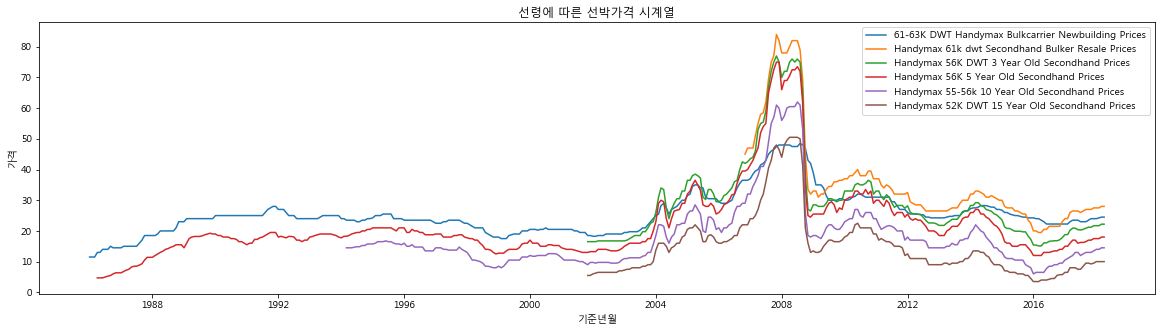

In [4]:
plt.figure(figsize=(20,5))
prices.columns = ['Date','NB','Resale','3y','5y','10y','15y']

plt.plot(prices['Date'], prices['NB'], label='61-63K DWT Handymax Bulkcarrier Newbuilding Prices')
plt.plot(prices['Date'], prices['Resale'], label='Handymax 61k dwt Secondhand Bulker Resale Prices')
plt.plot(prices['Date'], prices['3y'], label='Handymax 56K DWT 3 Year Old Secondhand Prices')
plt.plot(prices['Date'], prices['5y'], label='Handymax 56K 5 Year Old Secondhand Prices')
plt.plot(prices['Date'], prices['10y'], label='Handymax 55-56k 10 Year Old Secondhand Prices')
plt.plot(prices['Date'], prices['15y'], label='Handymax 52K DWT 15 Year Old Secondhand Prices')
plt.xlabel('기준년월')
plt.ylabel('가격')
plt.title('선령에 따른 선박가격 시계열')
plt.legend()
plt.show()

### 선령 5년 선박 대비, 선령 10년 선박 가격 비율

평균: 74.16%
표준편차: 6.07%
변동계수: 8.19%


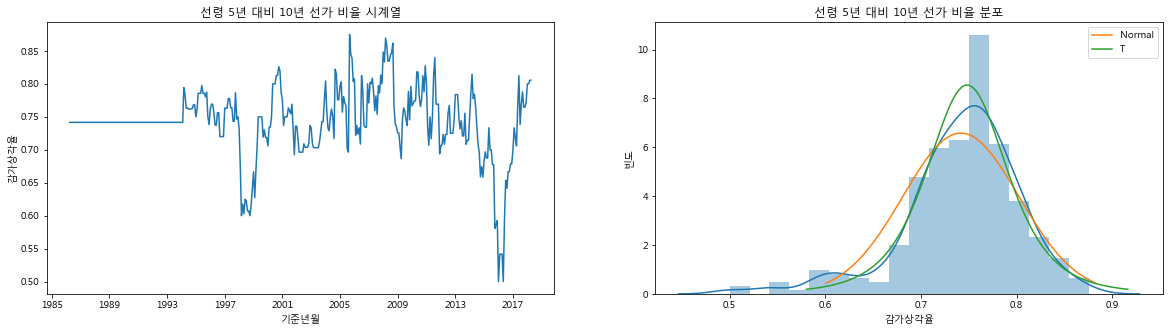

In [353]:
from scipy.stats import norm, t
fig, ax = plt.subplots(1,2, figsize=(20,5))
depreciation = prices['10y']/prices['5y']
print('평균: {:.2%}\n표준편차: {:.2%}\n변동계수: {:.2%}'.format(depreciation.dropna().mean(), depreciation.dropna().std(), depreciation.dropna().std()/depreciation.dropna().mean()))
n = len(prices['5y'].dropna())
date = prices.iloc[:n,0]
depreciation_filled = depreciation.fillna(depreciation.dropna().mean())[:n]

# 정규분포
params = norm.fit(depreciation.dropna())
rv = norm(loc=params[0], scale=params[1])
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

# 스튜던트 T 분포
params_2 = t.fit(depreciation.dropna())
rv_2 = t(df=params_2[0], loc=params_2[1], scale=params_2[2])
x_2 = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)

ax[0].plot(date, depreciation_filled)
ax[0].set_title('선령 5년 대비 10년 선가 비율 시계열')
ax[0].set_xlabel('기준년월')
ax[0].set_ylabel('감가상각율')

sns.distplot(depreciation.dropna())
ax[1].plot(x,rv.pdf(x), label='Normal')
ax[1].plot(x_2,rv_2.pdf(x_2), label='T')
ax[1].set_title('선령 5년 대비 10년 선가 비율 분포')
ax[1].set_xlabel('감가상각율')
ax[1].set_ylabel('빈도')
ax[1].legend(loc='best')

prices['8y'] = prices['5y'].dropna()*depreciation_filled**(3/5)

plt.show()

### 선령 10년 선박 대비, 선령 15년 선박 가격 비율

평균: 70.68%
표준편차: 8.50%
변동계수: 12.03%
--------------
정규분포
μ : 70.68%
σ : 8.48%


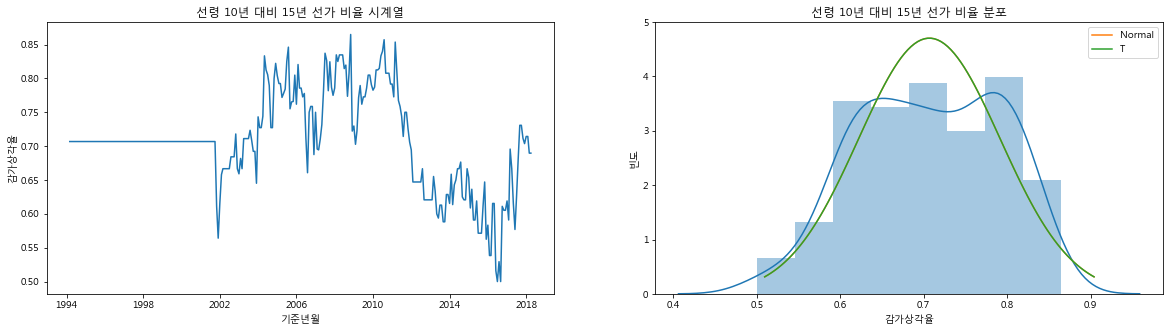

In [7]:
from scipy.stats import norm, t
fig, ax = plt.subplots(1,2, figsize=(20,5))

depreciation_2 = prices['15y']/prices['10y']
print('평균: {:.2%}\n표준편차: {:.2%}\n변동계수: {:.2%}'.format(depreciation_2.dropna().mean(), depreciation_2.dropna().std(), depreciation_2.dropna().std()/depreciation_2.dropna().mean()))
n = len(prices['10y'].dropna())
date = prices.iloc[:n,0]
depreciation_2_filled = depreciation_2.fillna(depreciation_2.dropna().mean())[:n]
prices['11y'] = prices['10y'].dropna()*depreciation_2_filled**(1/5)

# 정규분포
params = norm.fit(depreciation_2.dropna())
rv = norm(loc=params[0], scale=params[1])
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

# 스튜던트 T 분포
params_2 = t.fit(depreciation_2.dropna())
rv_2 = t(df=params_2[0], loc=params_2[1], scale=params_2[2])
x_2 = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)

ax[0].plot(date, depreciation_2_filled)
ax[0].set_title('선령 10년 대비 15년 선가 비율 시계열')
ax[0].set_xlabel('기준년월')
ax[0].set_ylabel('감가상각율')

sns.distplot(depreciation_2.dropna(), ax=ax[1])
ax[1].plot(x,rv.pdf(x), label='Normal')
ax[1].plot(x_2,rv_2.pdf(x_2), label='T')
ax[1].set_title('선령 10년 대비 15년 선가 비율 분포')
ax[1].set_xlabel('감가상각율')
ax[1].set_ylabel('빈도')
ax[1].set_ylim(0,5)
ax[1].legend(loc='best')

print('--------------')
print('정규분포')
print('μ : {:.2%}'.format(params[0]))
print('σ : {:.2%}'.format(params[1]))
plt.show()

### 1. 가격 분석

gamma's Loglikehood = -767.20   AIC = 1540.41   BIC = 1551.24
 beta's Loglikehood = -767.04   AIC = 1542.09   BIC = 1556.52

평균: 11.7만 달러
표준편차: 4.5만 달러
왜도: 0.9 (>0 이면 오른쪽으로 긴 꼬리를 가짐)


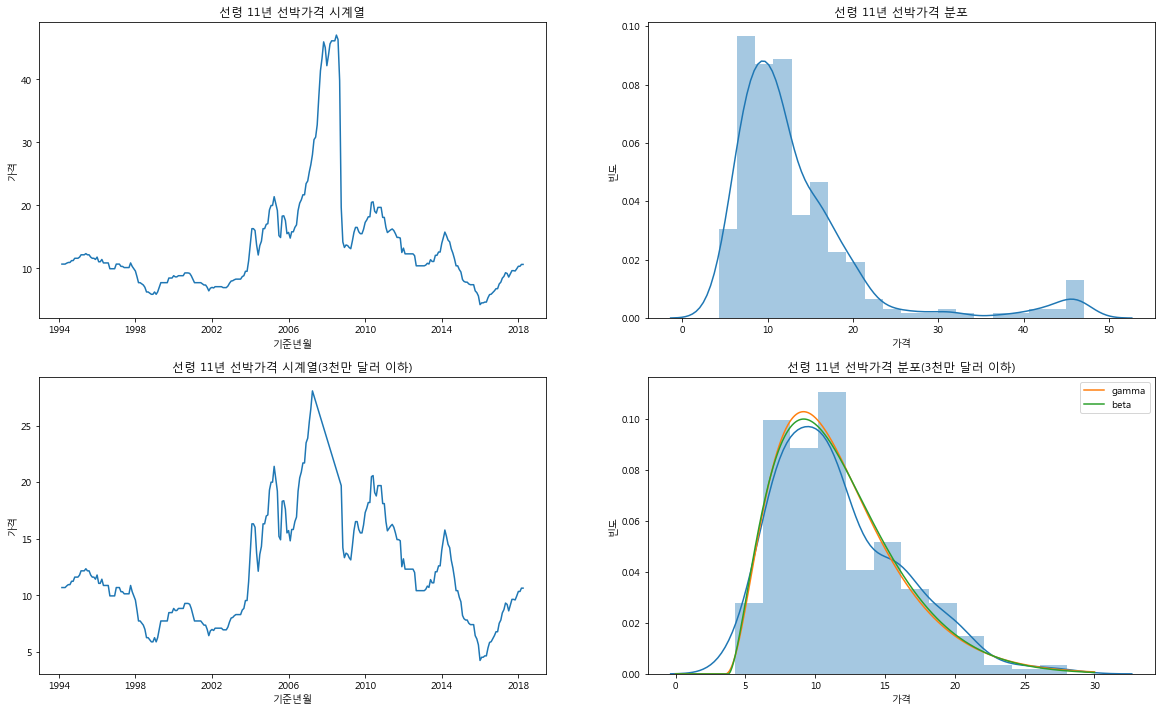

In [347]:
import scipy.stats
fig, ax = plt.subplots(2,2, figsize=(20,12))
adj = 12.5/prices['8y'][0] # 피보험선박 가격수준으로 값 조정

prices_11y = prices[['Date','11y']].dropna().set_index('Date')*adj
prices_11y_tunc = prices_11y[prices_11y < 30].dropna()

# 감마분포
params = gamma.fit(prices_11y_tunc)
rv = gamma(a=params[0], loc=params[1], scale=params[2])
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

# 로그정규분포
params_2 = lognorm.fit(prices_11y_tunc)
rv_2 = lognorm(s=params_2[0], loc=params_2[1], scale=params_2[2])
x_2 = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)

# 정규분포
params_3 = norm.fit(prices_11y_tunc)
rv_3 = norm(loc=params_3[0], scale=params_3[1])
x_3 = np.linspace(rv_3.ppf(0.01), rv_3.ppf(0.99), 100)

ax[0][0].plot(prices_11y)
ax[0][0].set_xlabel('기준년월')
ax[0][0].set_ylabel('가격')
ax[0][0].set_title('선령 11년 선박가격 시계열')

sns.distplot(prices_11y, ax=ax[0][1])
ax[0][1].set_xlabel('가격')
ax[0][1].set_ylabel('빈도')
ax[0][1].set_title('선령 11년 선박가격 분포')

ax[1][0].plot(prices_11y_tunc)
ax[1][0].set_xlabel('기준년월')
ax[1][0].set_ylabel('가격')
ax[1][0].set_title('선령 11년 선박가격 시계열(3천만 달러 이하)')

#dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']
dist_names = ['gamma','beta']
x = np.linspace(0,30,1000)
n = len(prices_11y_tunc)
result = []

sns.distplot(prices_11y_tunc, ax=ax[1][1])
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(prices_11y_tunc)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    mle = np.sum(np.log(dist.pdf(prices_11y_tunc, *param[:-2], loc=param[-2], scale=param[-1])))
    k = len(param)
    aic = -2*mle + 2*k
    bic = -2*mle + k*np.log(n)
    result.append([dist_name, mle, k, aic, bic, dist.ppf(0.25, *param[:-2], loc=param[-2], scale=param[-1]),dist.ppf(0.5, *param[:-2], loc=param[-2], scale=param[-1]),dist.ppf(0.75, *param[:-2], loc=param[-2], scale=param[-1])])
    print('{:>5}\'s Loglikehood = {:.2f}   AIC = {:.2f}   BIC = {:.2f}'.format(dist_name, mle, aic, bic))
    plt.plot(x, pdf_fitted, label=dist_name)
result = pd.DataFrame(result, columns=['name','mle','k','aic','bic','25%','50%','75%'])
ax[1][1].set_xlabel('가격')
ax[1][1].set_ylabel('빈도')
ax[1][1].set_title('선령 11년 선박가격 분포(3천만 달러 이하)')
ax[1][1].legend(loc='best')


mean = prices_11y_tunc.mean()[0]
std = prices_11y_tunc.std()[0]
skew = stats.skew(prices_11y_tunc)[0]
print('\n평균: {:.1f}만 달러\n표준편차: {:.1f}만 달러\n왜도: {:.1f} (>0 이면 오른쪽으로 긴 꼬리를 가짐)'.format(mean, std, skew))

plt.show()

### 1-2. 손해액 시뮬레이션

보험료 : 0.94만 달러
분포 : gamma, 사고확률 : 47.99%, 사고당 평균손해액 : 2.51만 달러, 기대손실액 : 1.21만 달러, Value-at-Risk(99.5%) : 6.04만 달러
분포 : beta , 사고확률 : 47.54%, 사고당 평균손해액 : 2.55만 달러, 기대손실액 : 1.21만 달러, Value-at-Risk(99.5%) : 6.03만 달러


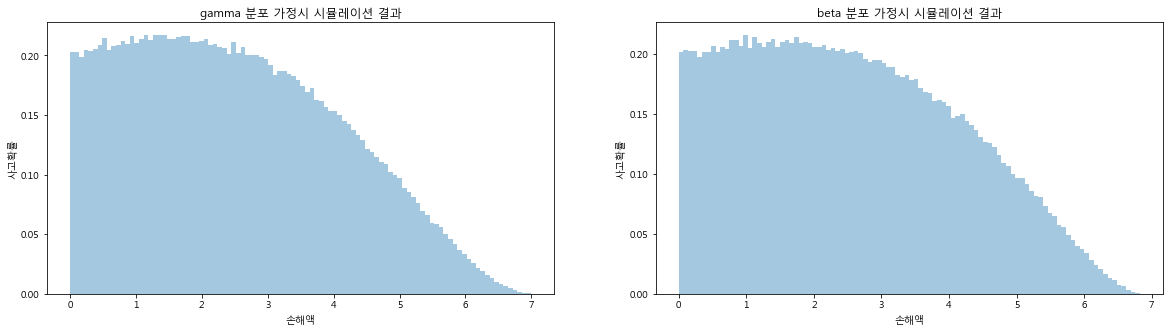

In [350]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
value = 12.5
cover_rate = 0.85
cover = value*cover_rate
rate = 0.075
premium = value*rate
print('보험료 : {:.2f}만 달러'.format(premium))

i=0
dist_names = ['gamma','beta']
result = []

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(prices_11y_tunc)
    n = 1000000
    simulation = np.fmax(cover - dist.rvs(size=n, *param[:-2], loc=param[-2], scale=param[-1]),0)
    f = np.count_nonzero(simulation)
    freq = f/n
    claims = simulation[simulation>0]
    sev = np.sum(claims)/f
    var = np.percentile(simulation,99.5)
    result.append([dist_name,freq,sev,freq*sev,var])
    sns.distplot(claims, bins=100, kde=False, norm_hist=True, ax=ax[i])
    ax[i].set_xlabel('손해액')
    ax[i].set_ylabel('사고확률')
    ax[i].set_title('{} 분포 가정시 시뮬레이션 결과'.format(dist_name))
    i+=1
result = pd.DataFrame(result, columns=['name','frequency','severity','loss','VaR(99.5%)'])

for i in result.index:
    print('분포 : {:5}, 사고확률 : {:.2%}, 사고당 평균손해액 : {:.2f}만 달러, 기대손실액 : {:.2f}만 달러, Value-at-Risk(99.5%) : {:.2f}만 달러'.format(result.loc[i,'name'], result.loc[i,'frequency'], result.loc[i,'severity'], result.loc[i,'loss'], result.loc[i,'VaR(99.5%)']))
plt.show()

### 2. 가격변화율 분석

평균: 0.26%
표준편차: 6.82%
왜도: -1.6 (<0 이면 왼쪽으로 긴 꼬리를 가짐)
--------------
t-분포
df : 1.73
Location : 0.30%
Scale : 2.97%


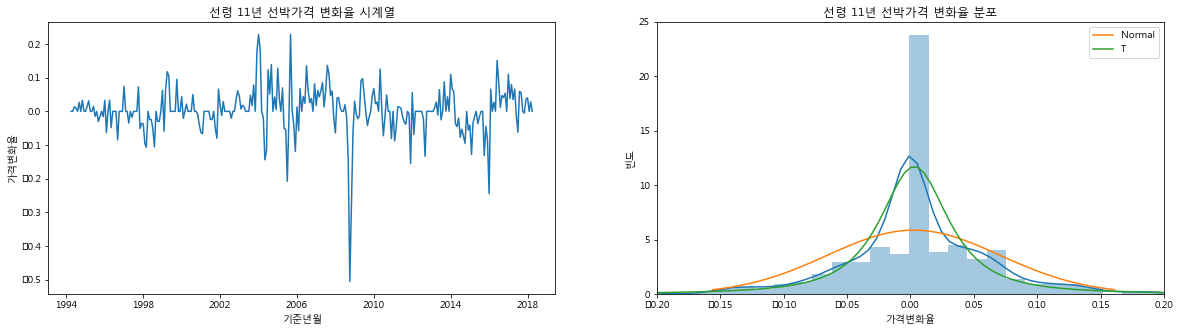

In [10]:
from scipy.stats import norm, t
fig, ax = plt.subplots(1,2, figsize=(20,5))
prices_11y_inc = (prices_11y/prices_11y.shift(-1)-1).dropna()

# 정규분포
params = norm.fit(prices_11y_inc)
rv = norm(loc=params[0], scale=params[1])
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

# 스튜던트 T 분포
params_2 = t.fit(prices_11y_inc)
rv_2 = t(df=params_2[0], loc=params_2[1], scale=params_2[2])
x_2 = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)

ax[0].plot(prices_11y_inc)
ax[0].set_xlabel('기준년월')
ax[0].set_ylabel('가격변화율')
ax[0].set_title('선령 11년 선박가격 변화율 시계열')

sns.distplot(prices_11y_inc, ax=ax[1])
ax[1].plot(x,rv.pdf(x), label='Normal')
ax[1].plot(x_2,rv_2.pdf(x_2), label='T')
ax[1].set_xlabel('가격변화율')
ax[1].set_ylabel('빈도')
ax[1].set_title('선령 11년 선박가격 변화율 분포')
ax[1].legend(loc='best')
ax[1].set_xlim(-0.2,0.2)

mean = prices_11y_inc.mean()[0]
std = prices_11y_inc.std()[0]
skew = stats.skew(prices_11y_inc)[0]
print('평균: {:.2%}\n표준편차: {:.2%}\n왜도: {:.1f} (<0 이면 왼쪽으로 긴 꼬리를 가짐)'.format(mean, std, skew))


print('--------------')
print('t-분포')
print('df : {:.2f}'.format(params_2[0]))
print('Location : {:.2%}'.format(params_2[1]))
print('Scale : {:.2%}'.format(params_2[2]))

plt.show()

### 3. 반납 시 잔존율 분석

    t's Loglikehood = 52.81   AIC = -99.62   BIC = -89.26
 norm's Loglikehood = 52.81   AIC = -101.62   BIC = -94.71
 beta's Loglikehood = 65.19   AIC = -122.38   BIC = -108.58
평균: 68.12%
표준편차: 19.33%
왜도: -0.0 (≒0 이면 좌우대칭분포를 가짐)


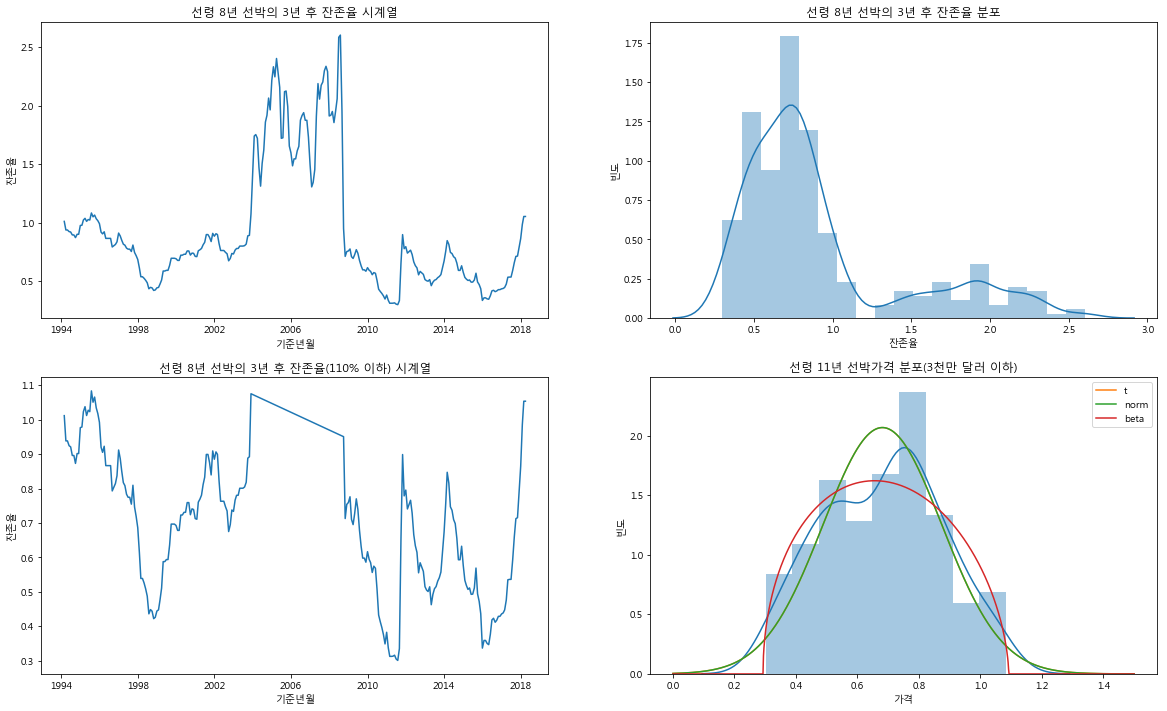

In [273]:
from scipy.stats import norm, t
fig, ax = plt.subplots(2,2, figsize=(20,12))

resids = (prices['11y']/prices['8y'].shift(-36)).dropna()
n = len(resids)
resids.index = prices['Date'][:n]
resids_trunc = resids[resids<1.1]


ax[0][0].plot(resids)
ax[0][0].set_xlabel('기준년월')
ax[0][0].set_ylabel('잔존율')
ax[0][0].set_title('선령 8년 선박의 3년 후 잔존율 시계열')

sns.distplot(resids, ax=ax[0][1])
ax[0][1].set_xlabel('잔존율')
ax[0][1].set_ylabel('빈도')
ax[0][1].set_title('선령 8년 선박의 3년 후 잔존율 분포')

ax[1][0].plot(resids_trunc)
ax[1][0].set_xlabel('기준년월')
ax[1][0].set_ylabel('잔존율')
ax[1][0].set_title('선령 8년 선박의 3년 후 잔존율(110% 이하) 시계열')


dist_names = ['t','norm','beta']
x = np.linspace(0,1.5,1000)
n = len(resids_trunc)
result = []
sns.distplot(resids_trunc, ax=ax[1][1])
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(resids_trunc)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    mle = np.sum(np.log(dist.pdf(resids_trunc, *param[:-2], loc=param[-2], scale=param[-1])))
    k = len(param)
    aic = -2*mle + 2*k
    bic = -2*mle + k*np.log(n)
    result.append([dist_name, mle, k, aic, bic])
    print('{:>5}\'s Loglikehood = {:.2f}   AIC = {:.2f}   BIC = {:.2f}'.format(dist_name, mle, aic, bic))
    plt.plot(x, pdf_fitted, label=dist_name)
result = pd.DataFrame(result, columns=['name','mle','k','aic','bic'])
ax[1][1].set_xlabel('가격')
ax[1][1].set_ylabel('빈도')
ax[1][1].set_title('선령 11년 선박가격 분포(3천만 달러 이하)')
ax[1][1].legend(loc='best')

mean = resids_trunc.mean()
std = resids_trunc.std()
skew = stats.skew(resids_trunc)
print('평균: {:.2%}\n표준편차: {:.2%}\n왜도: {:.1f} (≒0 이면 좌우대칭분포를 가짐)'.format(mean, std, skew))

plt.show()

### 3-2. 손해액 시뮬레이션 (2)

분포 : t   , 사고확률 : 80.88%, 사고당 평균손해액 : 2.92만 달러, 기대손실액 : 2.36만 달러
분포 : norm, 사고확률 : 80.90%, 사고당 평균손해액 : 2.92만 달러, 기대손실액 : 2.36만 달러
분포 : beta, 사고확률 : 76.85%, 사고당 평균손해액 : 3.14만 달러, 기대손실액 : 2.41만 달러


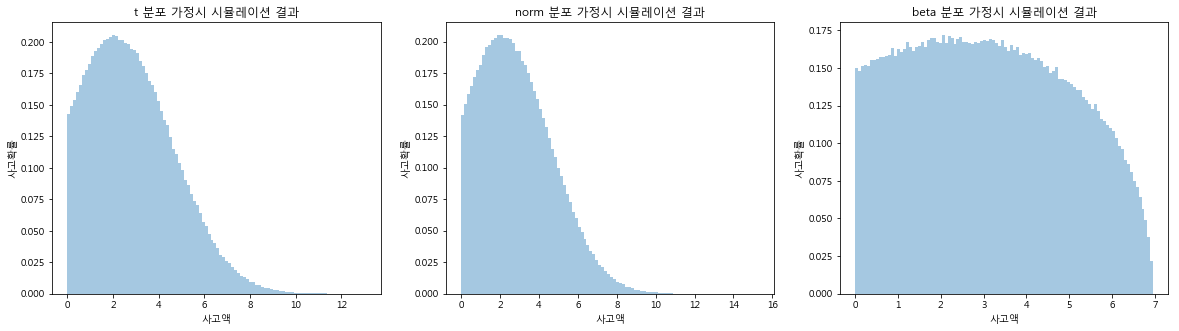

In [295]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
value = 12.5
cover_rate = 0.85

i=0
dist_names = ['t','norm','beta']
result = []
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(resids_trunc)
    n = 1000000
    simulation = np.fmax(cover_rate - dist.rvs(size=n, *param[:-2], loc=param[-2], scale=param[-1]),0)*value
    f = np.count_nonzero(simulation)
    freq = f/n
    claims = simulation[simulation>0]
    sev = np.sum(claims)/f
    result.append([dist_name,freq,sev,freq*sev])
    sns.distplot(claims, bins=100, kde=False, norm_hist=True, ax=ax[i])
    ax[i].set_xlabel('사고액')
    ax[i].set_ylabel('사고확률')
    ax[i].set_title('{} 분포 가정시 시뮬레이션 결과'.format(dist_name))
    i+=1
result = pd.DataFrame(result, columns=['name','frequency','severity','loss'])

for i in result.index:
    print('분포 : {:4}, 사고확률 : {:.2%}, 사고당 평균손해액 : {:.2f}만 달러, 기대손실액 : {:.2f}만 달러'.format(result.loc[i,'name'], result.loc[i,'frequency'], result.loc[i,'severity'], result.loc[i,'loss']))
plt.show()